In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
web_page = pd.read_html("https://en.wikipedia.org/wiki/COVID-19_pandemic_in_India","Recoveries")[1]


In [18]:
web_page = web_page.iloc[:,:5]

In [22]:
web_page.columns = ['states','total cases','death','recoveries','active cases']

In [25]:
web_page.drop([36,37],inplace=True)

In [27]:
# web_page.drop('sn',axis=1,inplace=True)

In [28]:
web_page

,states,total cases,death,recoveries,active cases
0,Andaman and Nicobar Islands,50,0,40,10
1,Andhra Pradesh,10002,119,4599,5284
2,Arunachal Pradesh,148,0,22,126
3,Assam,"5,831[b]",9,3762,2060
4,Bihar,8153,56,6104,1993
5,Chandigarh,418,6,322,90
6,Chhattisgarh,2362,12,1553,797
7,Dadra and Nagar Haveli and Daman and Diu,120,0,29,91
8,Delhi,66602,2301,39313,24988
9,Goa,909,1,205,703


In [33]:
web_page['death'][16] =  web_page['death'][16].strip('[]bac')
web_page['total cases'][3] =  web_page['total cases'][3].strip('[]ba').replace(',',"")

In [34]:
death = pd.Series(map(int,web_page['death']))
TC = pd.Series(map(int,web_page['total cases']))
rec = pd.Series(map(int,web_page['recoveries']))
AC = pd.Series(map(int,web_page['active cases']))

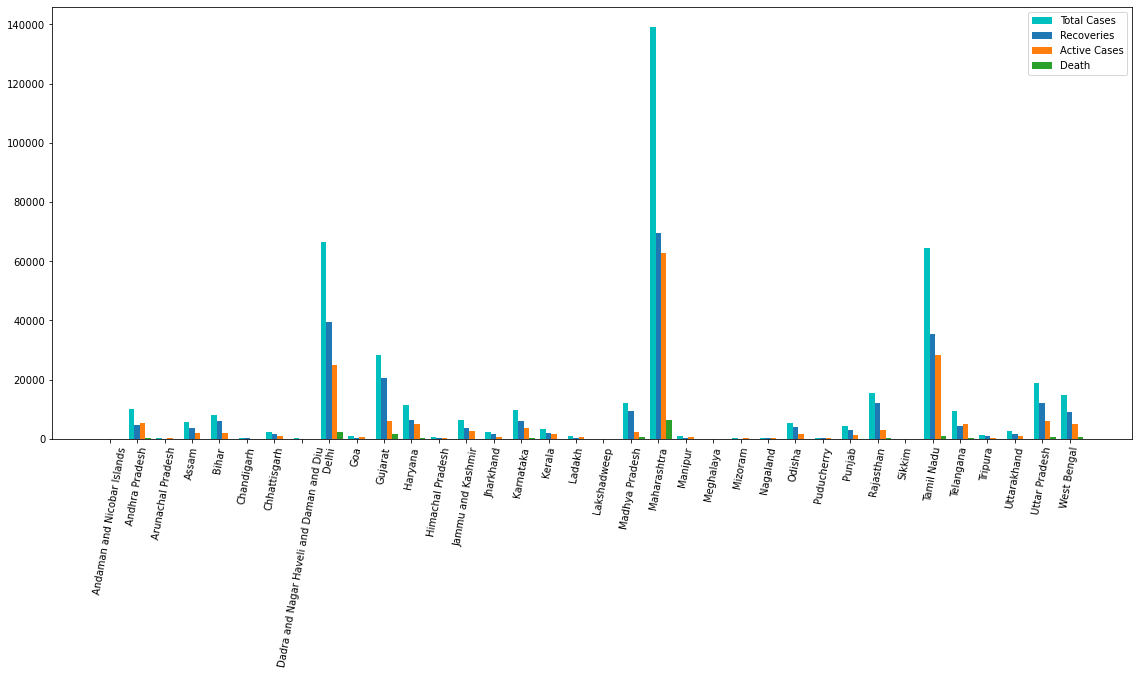

In [35]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_axes([0,0,1,1])
x = np.arange(0,36*4,step=4)
axes.bar(x,TC,width=0.8,label="Total Cases",color="c")
axes.bar(x+0.8,rec,width=0.8,label="Recoveries")
axes.bar(x+1.6,AC,width=0.8,label="Active Cases")
axes.bar(x+2.4,death,width=0.8,label="Death")
plt.xticks(x+0.8,web_page["states"],rotation=80)
axes.legend()
plt.show()

In [18]:
web_page.to_csv('covid19.csv')